# GeoClaw topotools examples

This [Jupyter notebook](http://www.jupyter.org) can be found in [collection of Clawpack apps](http://www.clawpack.org/apps.html) as the file [`$CLAW/apps/notebooks/geoclaw/topotools_examples.ipynb`](https://github.com/clawpack/apps/tree/master/notebooks/geoclaw/topotools_examples.ipynb).  
To run this notebook, [install Clawpack](http://www.clawpack.org/installing.html), and clone the [apps repository](https://github.com/clawpack/apps).
A static view of this and other notebooks can be found in the [Clawpack Gallery of Jupyter notebooks](http://www.clawpack.org/gallery/notebooks.html).

In [ ]:
This notebook contains some examples of working with the *clawpack.geoclaw.topotools* module.  These tools facilitate creating and manipulating the *topo* files that are required as GeoClaw input to specify topography and bathymetry (underwater topography).

See <http://www.clawpack.org/topotools_module.html> for general documentation of these tools and their use in the context of GeoClaw, and <http://www.clawpack.org> for more information on the Clawpack suite of software.

## Contents

 - <a href="#fetch">Fetching a topo file from the web</a>
 - <a href="#read">Reading a topo file</a>
 - <a href="#plot">Plotting topography data</a>
 - <a href="#crop">Cropping topography</a>
 - <a href="#coarsen">Coarsening topography</a>
 - <a href="#unstructured">Unstructured topography</a>

### Setup notebook and environment:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
from clawpack.geoclaw import topotools
import os
CLAW = os.environ['CLAW']
datadir = os.path.join(CLAW,'geoclaw','scratch') # directory for some sample data files

<div id="fetch"></div>
## Fetching a topo file from the web

Many GeoClaw examples are set up to use topography files that have already been created and archived on the web, e.g. the example found in `$CLAW/geoclaw/examples/tsunami/chile2010` uses a topo file that can be obtained by these commands (which are also found in the Python script `maketopo.py` found in that directory):

In [3]:
from clawpack.clawutil.data import get_remote_file
filename = 'etopo10min120W60W60S0S.asc'
url = 'http://depts.washington.edu/clawpack/geoclaw/topo/etopo/' + filename
get_remote_file(url=url, output_dir=datadir, force=True, verbose=True)

Done downloading.


'/home/jovyan/data/clawpack/geoclaw/scratch/etopo10min120W60W60S0S.asc'

In [4]:
# Topo sample file location (Lets us say, we have a dataframe, lets change it to a topo file)
import pandas as pd
sample_file_dir = '/home/jovyan/data/hydroinformatics/syn_topo/data/'
#sample_file_path = os.path.join(sample_file_dir, 'Melbourne.txt' )
#Melbourne_sample = pd.read_csv(sample_file_path)
#Melbourne_sample

sample_file_path = os.path.join(sample_file_dir, 'Sample_synthetic_file.csv' )
Sample_synthetic = pd.read_csv(sample_file_path)

#df_sample = pandas.read_csv(sample_file_path) 
#row_numbers = len(df_sample)
#col_numbers = len(df_sample.columns)

In [5]:
# Creating synthetic topo files (From the elevation profile of sample sites by fitting splines)

import numpy as np
from scipy.interpolate import CubicSpline
from matplotlib import pyplot as plt

#%%
import pandas as pd
import os
datadir = os.path.join('/home/jovyan/data/hydroinformatics/syn_topo/data') # directory for some sample data files
#filename = 'Elevation_profile2.csv'
filename = "Shallotte_profile.csv"
filepath = os.path.join(datadir, filename)
df = pd.read_csv(filepath)

#%%
elev = df.loc[:,'Elevation']
dist = (df.loc[:,'X_axis']-1)*3
dist = (dist-max(dist))*(-1)
#%%
#Create spline model

cs = CubicSpline(dist,elev)

syn_elev = cs(dist)


#%%
# Making it 3D

y = dist.to_numpy()
# x = np.linspace(0,5,num=len(y))
x = y
z = np.zeros((len(x),len(y)))
xyz = np.zeros((1,3))


#%%
# Defining the shorline shoreline (z=0 contour)
below_sl = elev<0
below_sl = below_sl.to_numpy()
base_shore = int(max(np.argwhere(below_sl)))
y_bs = y[base_shore]
x_max = max(x)
y_max = max(y)
s = y_bs+5000*abs(np.sin(x*2*np.pi/x_max)) #curved with point
# add in triangular bay centered at x = x_bay
# s = y*0
# x_bay = x_max/2
# bay_width = 1000
# bay_height = 5000
# out_bay = np.logical_or(x<(x_bay-bay_width/2),x>(x_bay+bay_width/2))
# in_bay = out_bay==False
# s[out_bay]= y_bs
# s[in_bay] = y_bs+5000-abs(x[in_bay]-x_bay)*bay_height/(bay_width/2)
# plt.plot(x,s)
# plt.ylim([0,30000])
#%%

col=1
# to make 2d grid of z values
for col in range(z.shape[0]):
    # z[:,col]=syn_elev*abs(np.sin(10*x[col]))
    # z[:,col]=syn_elev*x[col]
    # z[:,col]=syn_elev+5*(np.sin(x[col]*np.pi/x_max))
    # z[:,col]=syn_elev
    ynew = y-s[col]+y_bs
    ynew[ynew<0]=0
    ynew[ynew>y_max]=y_max
    z[:,col]=cs(ynew)


In [ ]:
# Saving the synthetic topo file
sample_file_path = os.path.join(sample_file_dir, 'fileType2.txt' )
pd.DataFrame(z).to_csv(sample_file_path, sep='\t', index=False)

In [6]:
# Making a subset of the synthetic topo file
xis = np.linspace(0,len(x),num = 50,endpoint=False).astype(int)
yis = np.linspace(0,len(y),num = 50,endpoint=False).astype(int)
zis = np.meshgrid(xis,yis,indexing = 'ij')
zsub = z[zis]
zsub = np.flip(zsub)

sample_file_path = os.path.join(sample_file_dir, 'fileType2_subset.txt' )
pd.DataFrame(zsub).to_csv(sample_file_path, sep='\t', index=False, header = False)

<ipython-input-6-ba3bda24a602>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  zsub = z[zis]


In [7]:
# Checking the size of the file
z.shape[1]

10021

In [11]:
# Code to generate header and the header file for Type 2 of Topo files
def header_string( col_numbers, row_numbers, size_cell):
   header = 'ncols\t\t'+str(col_numbers)+'\nnrows\t\t'+str(row_numbers)+'\nxllcorner\t'+str(0)+'\nyllcorner\t'+str(0)+'\ncellsize\t'+str(size_cell)+'\nNODATA_value\t-9999\n'
   return header
result_header = header_string(zsub.shape[0],zsub.shape[1],3)
result_header

sample_file_path_out_header = os.path.join(sample_file_dir, 'header.txt' )
Type2_header = open(sample_file_path_out_header,'w')
Type2_header.write(result_header)
print(result_header)
Type2_header.close()


ncols		50
nrows		50
xllcorner	0
yllcorner	0
cellsize	3
NODATA_value	-9999



In [12]:
# Merging the header file and the generated synthetic topography to create a Type 2 topo file
data = data2 = ""
 
# Reading data from the header
with open(sample_file_path_out_header) as fp:
    data = fp.read()

with open(sample_file_path) as fp:
    data2 = fp.read()
    
# Merging header to the file
data += data2

sample_file_path_out_header = os.path.join(sample_file_dir, 'Final.txt' )
with open (sample_file_path_out_header, 'w') as fp:
    fp.write(data)


If all you want to do is use this topo file in a GeoClaw run, you do not need to use any further Python tools.

<div id="read"></div>

## Reading a topo file

In order to plot or manipulate the topo data, we first read the file we just downloaded into a `topotools.Topography` object.  To do so, we must know how the data is formatted.  This file is in the format `topo_type==2` as described at <http://clawpack.github.io/doc/topo.html>:

In [13]:
topo_path = os.path.join(sample_file_dir, 'Final.txt' )
topo = topotools.Topography()
topo.read(topo_path, topo_type=2)

*** Note: since grid registration is llcorner,
    will shift x,y values by (dx/2, dy/2) to cell centers


We can now do various things with the data.  First let's print out some basic attributes:

In [14]:
print("The extent of the data in longitude and latitude: ")
print(topo.extent)

The extent of the data in longitude and latitude: 
[1.5, 148.5, 1.5, 148.5]


In [15]:
print("The shapes of 1-dimensional arrays of longitude x and latitude y values:", topo.x.shape, topo.y.shape)
print("The shapes of 2-dimensional arrays X,Y and the topography data Z:", topo.Z.shape)

The shapes of 1-dimensional arrays of longitude x and latitude y values: (50,) (50,)
The shapes of 2-dimensional arrays X,Y and the topography data Z: (50, 50)


From the filename you might guess this is 10-arcminute data, we can check that it is:

In [16]:
print("topo.delta = ",topo.delta)
print("10 arcminutes is 1/6 degree = %8.6f degree" % (1./6.))

topo.delta =  (3.0, 3.0)
10 arcminutes is 1/6 degree = 0.166667 degree


<div id=plot></div>
## Plotting topography data

A simple plot with various defaults used can be obtained simply by:

<AxesSubplot:>

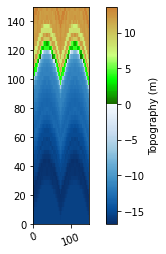

In [17]:
topo.plot()

You can specify the limits of the color range:

<AxesSubplot:>

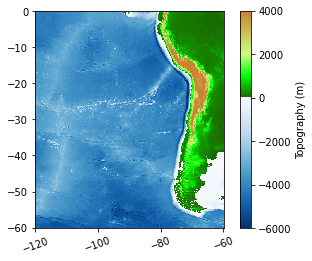

In [9]:
topo.plot(limits=(-6000,4000))

Various other arguments can be supplied for more control, see [the documentation](http://www.clawpack.org/topotools_module.html).

Of course you can plot the data any way you want using the X, Y, and Z attributes.

Here are a couple examples:

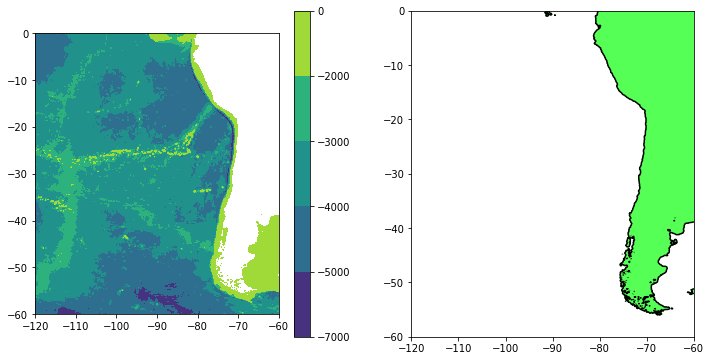

In [10]:
figure(figsize=(12,6))
subplot(121)
contourf(topo.X, topo.Y, topo.Z, [-7000, -5000, -4000, -3000, -2000, 0])
colorbar()
# rescale aspect ratio based on mean latitude so distances more correct:
gca().set_aspect(1.0 / cos(pi / 180.0 * topo.y.mean()))  

subplot(122)
contourf(topo.X, topo.Y, topo.Z, [0,10000], colors = '#55ff55')
contour(topo.X, topo.Y, topo.Z, [0], linestyles='-', colors='k')
gca().set_aspect(1.0 / cos(pi / 180.0 * topo.y.mean()))  


<div id=crop></div>
## Cropping topography

Sometimes it is useful to crop a large topo file to create a smaller one that contains a sub-region, e.g.

In [11]:
filter_region = (-90, -60, -60, -40)
topo2 = topo.crop(filter_region)
topo2.Z.shape

(120, 180)

<AxesSubplot:>

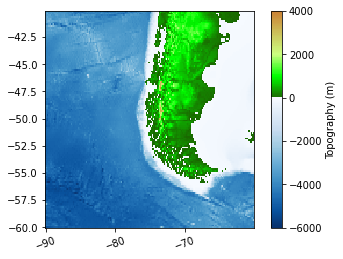

In [12]:
topo2.plot()

The cropped topography can be written out to a new file, which will be smaller than the original:

In [13]:
topo2_path = os.path.join(datadir,'tip_of_south_america.tt3')
topo2.write(topo2_path, topo_type=3)

In [14]:
print("Size of the new file: %s bytes" % os.stat(topo2_path).st_size)
print("Size of the original file: %s bytes" % os.stat(topo_path).st_size)

Size of the new file: 345984 bytes
Size of the original file: 985529 bytes


To obtain topography for other regions, see the links at <http://clawpack.github.io/doc/tsunamidata.html>

<div id=coarsen></div>
## Coarsening topography

The `crop` function also has an optional argument `coarsen` with default value 1.  If the value is  larger integer than it coarsens the grid by that factor in each direction.

In the example below `filter_region=None` specifies that the original domain size should be retained, but one can also crop it at the same time as coarsening.

The original grid was of shape (361, 361), topo3 has shape (91, 91)


Text(0.5, 1.0, 'Coarsened')

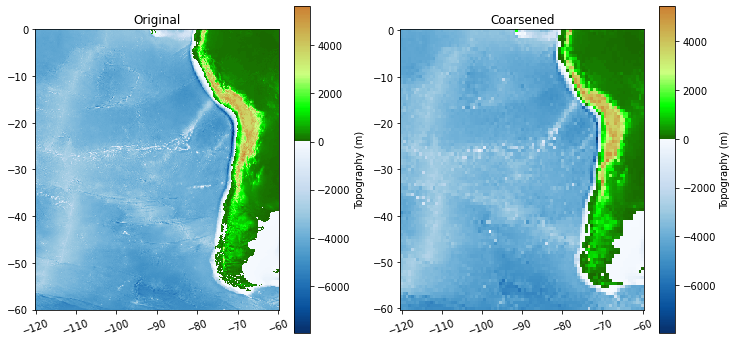

In [15]:
topo3 = topo.crop(filter_region=None, coarsen=4)
print("The original grid was of shape %s, topo3 has shape %s" % (topo.Z.shape,topo3.Z.shape))

figure(figsize=(12,6))
ax1 = subplot(121)
topo.plot(axes=ax1)
title('Original')
ax2 = subplot(122)
topo3.plot(axes=ax2)
title('Coarsened')

<div id=unstructured></div>
## Unstructured Topography

The `topotools` and `Topography` class also have facilities for handling unstructured topography data.  To start we will randomly sample the data we were working with above to get an unstructured data file.  Here we generate random tuples of longitude-latitude and interpolate the original data so we can get a field at the random points.

In [16]:
import scipy.interpolate as interpolate

N = 10000

x = numpy.random.rand(N) * (topo.x[-1] - topo.x[0]) + topo.x[0]
y = numpy.random.rand(N) * (topo.y[-1] - topo.y[0]) + topo.y[0]

# Here we need to transpose the Z array so that the coordinate evaluation is correct
bathy = interpolate.RectBivariateSpline(topo.x, topo.y, topo.Z.transpose())

# strange hack to evaluate the function `bathy` produced by RectBivariateSpline since bathy(x, y) does not work
z = numpy.empty(x.shape)
for i in range(x.shape[0]):
    z[i] = bathy(x[i], y[i])

Now lets construct the unstructured topography object based on the random locations we just generated.

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
8,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
9,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [27]:
x = Melbourne_sample['Longitude']
y = Melbourne_sample['Latitude']
z = Melbourne_sample['Elevation']

0       3.102435e+06
1       3.102436e+06
2       3.102436e+06
3       3.102437e+06
4       3.102438e+06
            ...     
9783    3.117581e+06
9784    3.117584e+06
9785    3.117587e+06
9786    3.117590e+06
9787    3.117593e+06
Name: Longitude, Length: 9788, dtype: float64

In [30]:
unstructured_topo = topotools.Topography(unstructured=True)
unstructured_topo.x = x
unstructured_topo.y = y
unstructured_topo.z = z

We can plot the data as is to see what we randomly created so far

/home/jovyan/data/clawpack/geoclaw/src/python/geoclaw/topotools.py:1241: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  axes.set_ylim(y1,y2)


<AxesSubplot:>

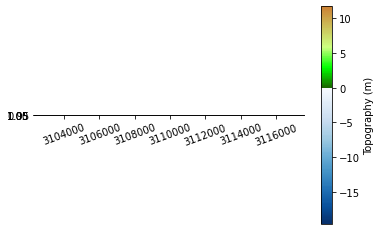

In [29]:
unstructured_topo.plot()

One of the primary things we want to be able to do with unstructured topography data is to turn it into structured data which GeoClaw can use.  In order to do this, there is a method in the `Topography` class called `interp_unstructured` which has a number of options.  Here we will just go with the defaults (please see the documentation for the full assortment of options).   In this case we will provide two things to the routine.  The first is topography to use to fill in possible gaps in the unstructured topography.  This "fill topography" can be structured or unstructured.  The second argument we provide is a limit on the calculated grid spacing.  The routine attempts to calculate the minimum distance between two points and uses this as the basis of the structured grid.  Placing a limit on this insures that the resulting grid is not too fine.  Addtional options for filtering the data in the routine, smoothing and interpolation strategies are also available.

In [ ]:
#unstructured_topo.interp_unstructured(topo, delta_limit=10000)  # fills in with original topography, if available
unstructured_topo.interp_unstructured([], delta_limit=10000)  # does not fill in with other topo, more realistic

Now that the topography has been interpolated onto a new grid, we can check to see if the `unstructured` attribute is in fact now set to `False`.

In [ ]:
unstructured_topo.unstructured

A new set of attributes `X, Y, Z` have been created, interpolated to a regular grid:

In [ ]:
print("unstructured_topo.z has shape %s, unstructured_topo.Z has shape %s" \
        % (unstructured_topo.z.shape, unstructured_topo.Z.shape))

Usually at this point you will want to save out a copy of the interpolated topography for use with GeoClaw, the usual functions from before work of course.  More interesting is to plot the new topography which we can again do by using the `plot` function:

In [ ]:
unstructured_topo.plot()